# Zadanie 1

In [548]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
%matplotlib inline

In [615]:
def myPCA(X):
    
   
    X_std = ((X.T - np.mean(X, axis=1)) /np.std(X, axis=1)).T
       
    S = np.cov(X_std)
    eigenValues, eigenVectors = np.linalg.eig(S)
    
    #idx = eigenValues.argsort()[::-1]   
    #eigenValues = eigenValues[idx]
    #eigenVectors = eigenVectors[:,idx]
    

    
    Y = (1/np.sqrt(eigenValues) * np.dot(eigenVectors, X_std).T).T
    return X, X_std, Y
    
    
def plot(X,X_std,Y):
    #pca = PCA(2)
    #pcs = pca.fit_transform(X.T)

    plt.scatter(X[0,], X[1,], color='blue')
    #plt.scatter(X_std[0,], X_std[1,], color = 'orange')
    if np.std(Y[0,]) > np.std(Y[1,]):
        plt.scatter(Y[0,],Y[1,], color='green')
    else:
        plt.scatter(Y[1,],Y[0,], color='green')
    #plt.scatter(pcs[:,0], pcs[:,1], color = 'red')
    

array([[ 0.26346364,  0.50682515,  0.39597036, ..., -0.07649012,
        -0.35744716, -0.11510091],
       [-3.5466577 , -0.29070135,  2.94958553, ..., -1.98459713,
        -2.55271788, -3.18614027]])

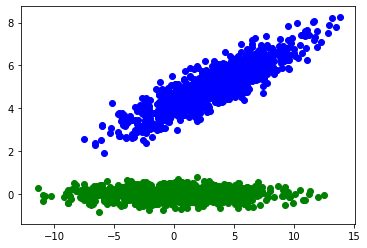

In [616]:
n = 1000
mean = np.array([3,5])
cov = np.array([[12,3],[3,1]])
x = np.random.multivariate_normal(mean,cov,n)

X, X_std, Y = myPCA(x.T)
plot(X, X_std, Y)
Y

In [444]:
print(f"Original: \nmean:\n {np.round(np.mean(X, axis=1),2)} \ncovariance:\n {np.round(np.cov(X),2)}\n")
print(f"After standarization: \nmean:\n {np.round(np.mean(X_std, axis=1),2)} \ncovariance:\n {np.round(np.cov(X_std),2)}\n")
print(f"After PCA: \nmean:\n {np.round(np.mean(Y, axis=1),2)} \ncovariance:\n {np.round(np.cov(Y),2)}")

Original: 
mean:
 [3.08 5.03] 
covariance:
 [[11.36  2.81]
 [ 2.81  0.95]]

After standarization: 
mean:
 [-0.  0.] 
covariance:
 [[1.   0.86]
 [0.86 1.  ]]

After PCA: 
mean:
 [-0. -0.] 
covariance:
 [[12.92  0.  ]
 [ 0.    0.08]]


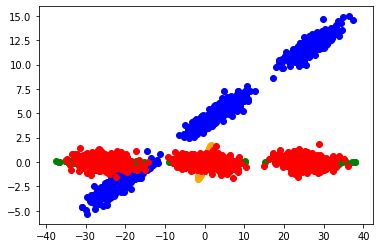

In [408]:
p = np.array([1/3,1/3,1/3])
mu1 = np.array([-21,-2])
mu2 = np.array([3,5])
mu3 = np.array([27,12])
cov = np.array([[12,3],[3,1]])

n=1000
data = []
for i in range(n):
    ran = np.random.choice(np.array([1,2,3]),size=1, p=p)
    if ran == 1:
        x = np.random.multivariate_normal(mu1,cov,1)
    if ran == 2:
        x = np.random.multivariate_normal(mu2,cov,1)    
    if ran == 3:
        x = np.random.multivariate_normal(mu3,cov,1) 
    data.append(x)
x = np.vstack(data)

X, X_std, Y = myPCA(x.T)
plot(X, X_std, Y)


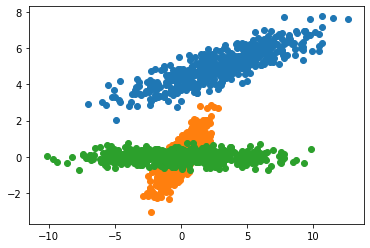

In [244]:
n = 500

# a)
mean = np.array([3,5])
cov = np.array([[12,3],[3,1]])
x = np.random.multivariate_normal(mean,cov,n)


# b)
X = x.copy()
X[:,0] = (X[:,0] - np.mean(x[:,0])) /np.std(x[:,0])
X[:,1] = (X[:,1] - np.mean(x[:,1])) /np.std(x[:,1])

X = X.T

# c)
S = np.cov(X)

# d) bez uporządkowania malejąco

eigvals, eigvectors = np.linalg.eig(S)

# e)
y = (1/np.sqrt(eigvals) * np.dot(eigvectors, X).T).T

plt.scatter(x[:,0], x[:,1])
plt.scatter(X[0,], X[1,])
plt.scatter(y[0,], y[1,])

# Iris

In [409]:
from sklearn.datasets import load_iris

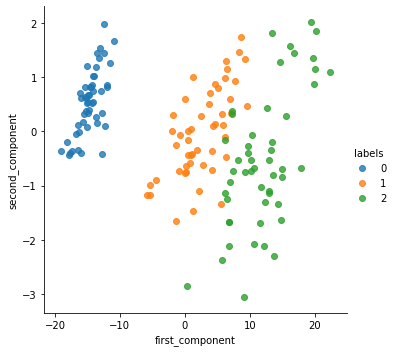

In [632]:
x, y = load_iris(True)


X, X_std, Y = myPCA(x.T)
    
df = pd.DataFrame(dict(first_component=Y[3,], second_component=Y[2,], labels=y))

sns.lmplot('first_component', 'second_component', data=df, hue='labels', fit_reg=False)


In [633]:
pca = PCA(2)
pcs = pca.fit_transform(x)

df = pd.DataFrame(dict(first_component=pcs[:,0], second_component=pcs[:,1], labels=y))

sns.lmplot('first_component', 'second_component', data=df, hue='labels', fit_reg=False)


TypeError: __init__() takes 1 positional argument but 2 were given

In [634]:
pca = PCA()
pca.prepare(X.T)
pcs = pca.project(X.T, 2)

pcs
rev = pca.revert(pcs,2)

np.sum(np.square(rev-X.T))

#df = pd.DataFrame(dict(first_component=pcs[:,0], second_component=pcs[:,1], labels=y))

#sns.lmplot('first_component', 'second_component', data=df, hue='labels', fit_reg=False)

Coverage of Variance:
               0         1         2         3
eVal    4.228242  0.242671  0.078210  0.023835
eTotal  4.228242  4.470912  4.549122  4.572957
Idiv%   0.924619  0.053066  0.017103  0.005212
%       0.924619  0.977685  0.994788  1.000000




15.204644359438952

In [1000]:

class PCA:
    def __init__(self):
        self.eigenValues = None
        self.eigenVectors = None
        self.mean_data = None
        self.sd_data = None
        self.std_data = None

    # Find all eigenvalues and eigenvectors
    # data -> instances as rows
    def fit(self, data):
        
        # Standarize data
        self.mean_data = np.mean(data, axis=0)
        self.sd_data = np.std(data, axis=0)
        
        std_data = data - self.mean_data  
        #std_data = (data - self.mean_data) / self.sd_data
        self.std_data = std_data

        
        # Covariance matrix
        S = np.cov(std_data.T)
        
        
        
        # Eigen values and eigen vectors (with sorting)
        self.eigenValues, self.eigenVectors = np.linalg.eigh(S)
        #self.eigenValues = np.real(self.eigenValues)
        #self.eigenVectors = np.real(self.eigenVectors)
        idx = np.argsort(self.eigenValues)
        idx = idx[::-1]
        self.eigenVectors = self.eigenVectors[:,idx]
        self.eigenValues = self.eigenValues[idx]
        
        
        
        # Print the coverage of variance
#         table = pd.DataFrame(index=['eVal','eTotal', 'Idiv%', '%'], columns=list(range(len(self.eigenValues))))
#         current_val = 0
#         total_val = np.sum(self.eigenValues)
#         for i, val in enumerate(self.eigenValues):
#             current_val += val
#             table[i] = [val, current_val, val/total_val, current_val/total_val]
#         print('Coverage of Variance:')
#         print(table)
#         print("\n")

    # Project the data into the normal or abnormal subspace
    def project(self, data, d, normal_subspace=True):
        adj_data = data - self.mean_data
        if normal_subspace:
            # Extract only the top most eigenvectors
            eigenVectors = self.eigenVectors[:,:d]
        else:
            # Extract the smallers eigenvectors as the anomalous part
            eigenVectors = self.eigenVectors[:,d:]
        # Return the projected data
        return np.dot(adj_data, eigenVectors)

    def revert(self, projected_data, d):
        eigenVectors = self.eigenVectors[:,:d]
        return np.dot(projected_data, eigenVectors.T) + self.mean_data
    
    
pca = PCA()
pca.fit(X.T)
pcs = pca.project(X.T, 2, True)

pcs
rev = pca.revert(pcs,2)

np.sum(np.square(rev-X.T))


561.7103930493031


### l)
https://stats.stackexchange.com/questions/266864/why-is-the-sum-of-eigenvalues-of-a-pca-equal-to-the-original-variance-of-the-dat

In [660]:
np.sum(pca.eigenValues), np.sum(np.square( pca.sd_data ))

(4.572957046979869, 4.542470666666667)

# Zadanie 2

In [1001]:
from scipy.io import loadmat

# Load train data
train_file = loadmat("/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista7/Lista07Dane/ReducedImagesForTraining.mat")
X_train = train_file['images']
X_train = X_train.T

# Load test data
test_file = loadmat("/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista7/Lista07Dane/ReducedImagesForTesting.mat")
X_test = test_file['images']
X_test = X_test.T

# Labels
y_train = np.round(np.arange(3,np.shape(X_train)[0]+3) / 5,0).astype(int)
y_test = np.round(np.arange(1,np.shape(X_test)[0]+1)-1 / 2 +1,0).astype(int) / 2

np.shape(X_train) , np.shape(X_test), np.shape(y_train), np.shape(y_test)

((250, 4920), (100, 4920), (250,), (100,))

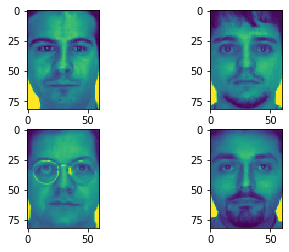

In [1020]:
# Look on images
n = 60
m = 82

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(X_train[0,:].reshape(n,m).T)
axs[0,1].imshow(X_train[5,:].reshape(n,m).T)
axs[1,0].imshow(X_train[10,:].reshape(n,m).T)
axs[1,1].imshow(X_train[15,:].reshape(n,m).T)

IndexError: index 159 is out of bounds for axis 0 with size 100

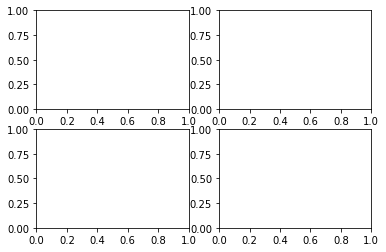

In [1016]:
# Look on images
n = 60
m = 82

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(X_test[0,:].reshape(n,m).T)
axs[0,1].imshow(X_test[2,:].reshape(n,m).T)
axs[1,0].imshow(X_test[4,:].reshape(n,m).T)
axs[1,1].imshow(X_test[6,:].reshape(n,m).T)

In [1003]:
pca = PCA()
pca.fit(X_train)


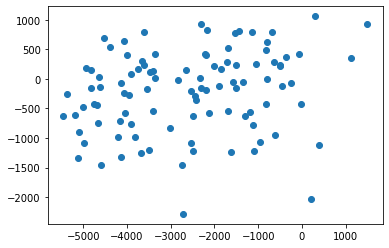

In [1006]:
pcs = pca.project(X_test, 2)

pcs
#rev = pca.revert(pcs,50)

#np.sum(np.square(rev-data))


plt.scatter(pcs[:,0], pcs[:,1])

# Zadanie 3

In [1004]:
# Function to calculate distance matrix
def dist(X,Y):
    return (X**2).sum(axis=1)[np.newaxis].T - 2 * X.dot(Y.T) + (Y**2).sum(axis=1)[np.newaxis]

array([32, 32, 25,  2, 32, 32, 25, 35, 39, 32,  6,  6, 32, 32, 13, 13, 19,
        9, 30, 30, 30, 30, 33, 33, 32, 32, 25, 33, 33, 33, 19, 19, 32, 32,
       25,  2, 19, 19, 33, 32, 32, 32, 32, 32,  1,  1, 33, 33, 32, 32,  9,
       26, 33, 33, 30, 30, 25, 13, 30, 30, 33, 33, 32, 32, 33, 33, 30, 32,
       33, 33, 32, 32, 33, 33, 38, 38, 32, 32,  1, 33, 30, 47, 32, 32, 22,
       22, 19, 13, 32, 33, 19,  6, 47, 32, 50, 48, 32, 32, 32, 32])

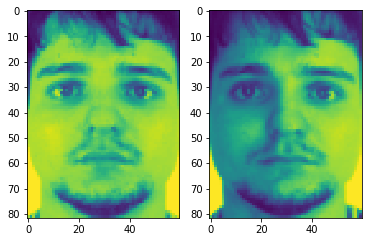

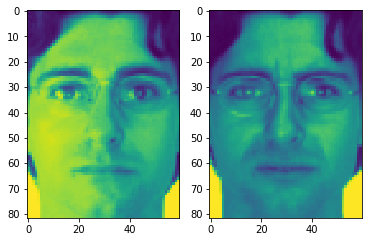

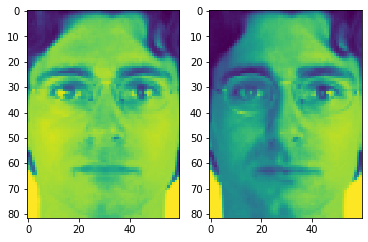

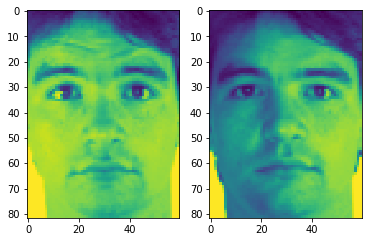

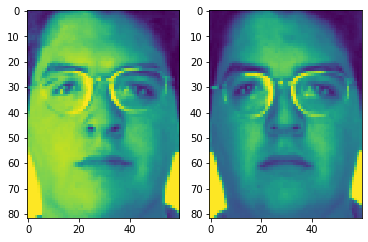

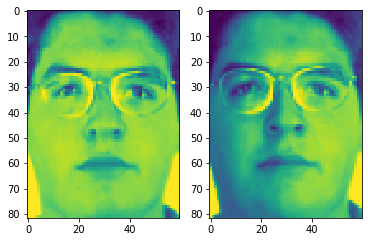

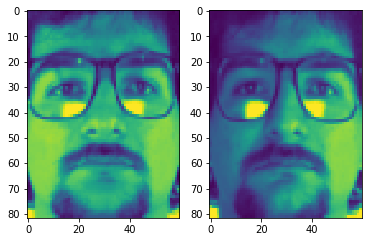

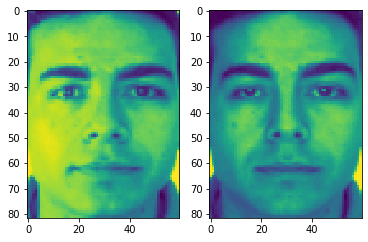

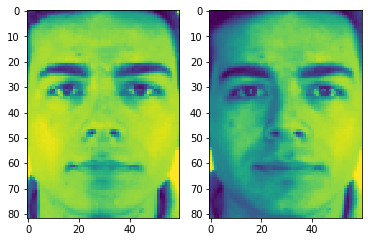

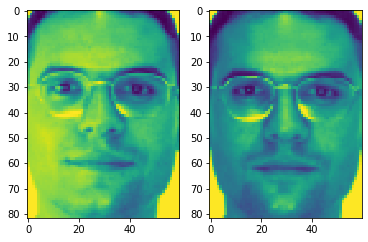

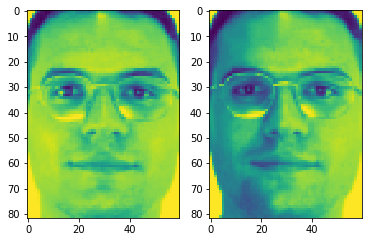

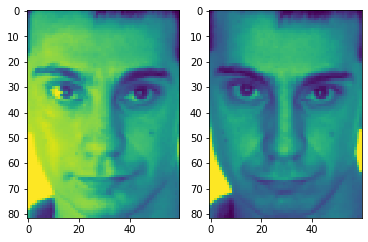

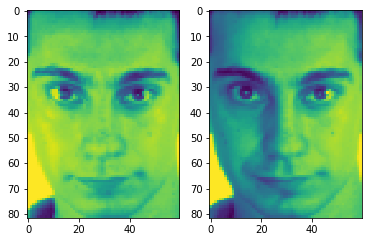

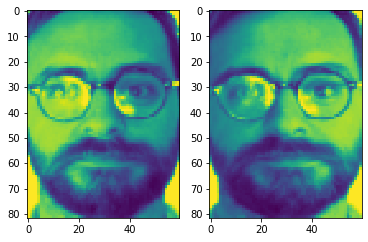

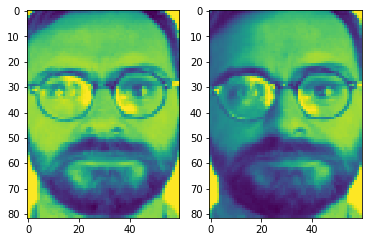

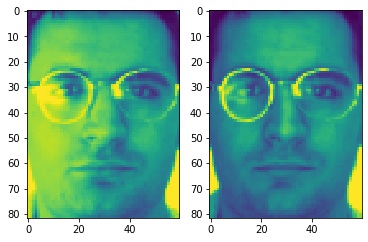

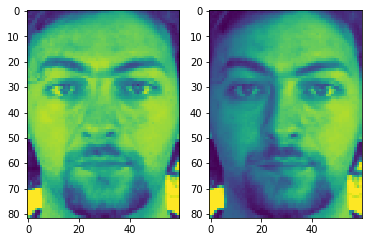

In [1110]:

dists = dist(X_train, X_test)

y_predict = np.floor((np.argmin(dists, axis=0))/5).astype(int) +1
good_preds = np.sum(y_predict == y_test)

for i in range(good_preds):

    idx_test = np.argwhere(y_predict == y_test).flatten()
    idx_train =np.argmin(dists, axis=0)[y_predict == y_test]

    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(X_test[idx_test[i],:].reshape(n,m).T)
    ax2.imshow(X_train[idx_train[i],:].reshape(n,m).T)
y_predict

# Zadanie 4

In [1092]:
dims = 250


scores = []
for dim in range(dims):
    reducted_train = pca.project(X_train, dim)
    reducted_test = pca.project(X_test, dim)


    dists = dist(reducted_train, reducted_test)

    y_predict = np.floor((np.argmin(dists, axis=0))/5).astype(int) +1
    good_preds = np.sum(y_predict == y_test)
    
    scores.append(good_preds)
    #print(f"reduction dimension:{dim}, score:{good_preds}" )




Text(0, 0.5, '% Poprawnych klasyfikacji')

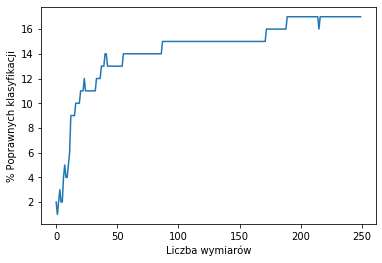

In [1093]:
plt.plot(scores)
plt.xlabel('Liczba wymiarów')
plt.ylabel('% Poprawnych klasyfikacji')

# Zadanie 5

In [1094]:
from sklearn.neighbors import KNeighborsClassifier

In [1141]:
scores = []
for k in range(1,30):

    KNN = KNeighborsClassifier(k)
    KNN.fit(X_train, y_train)
    y_predict = KNN.predict(X_test)
    scores.append(np.sum(y_predict == y_test))
    

Najlepsze k: 3


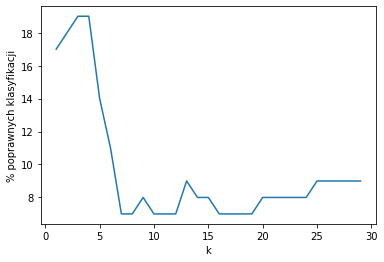

In [1153]:
plt.plot(range(1,30), scores)
plt.xlabel('k')
plt.ylabel('% poprawnych klasyfikacji')
print(f"Najlepsze k: {np.argmax(scores)+1}" )

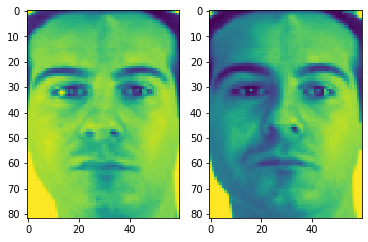

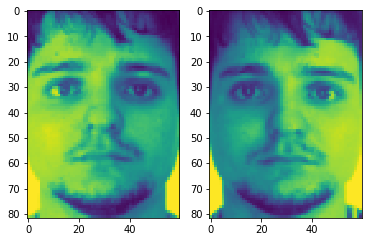

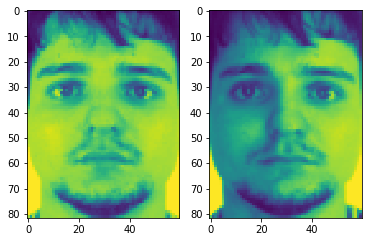

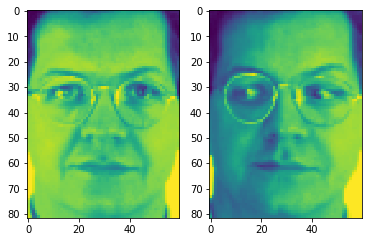

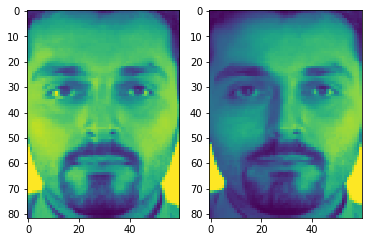

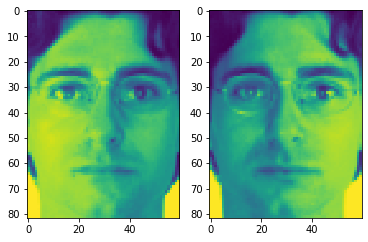

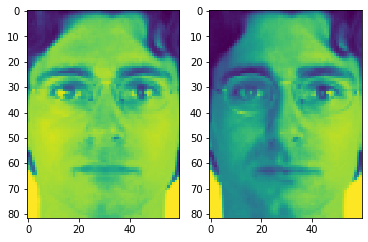

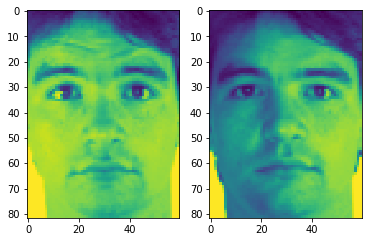

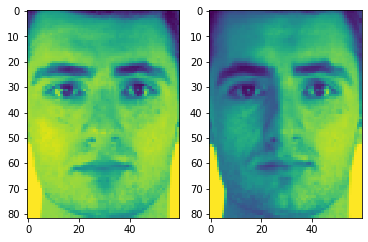

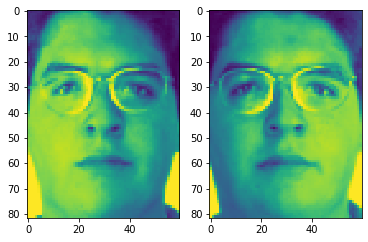

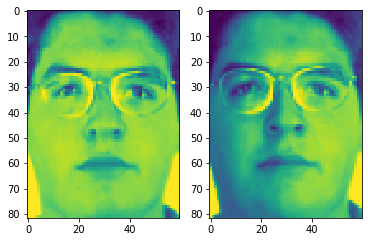

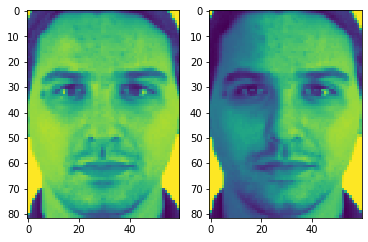

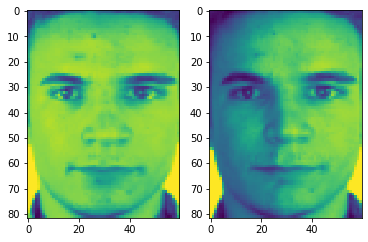

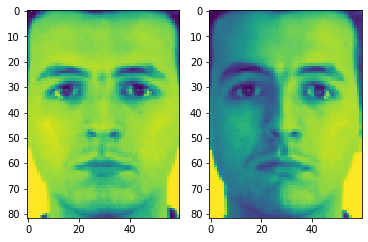

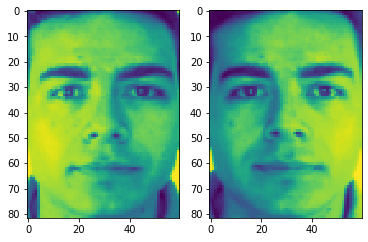

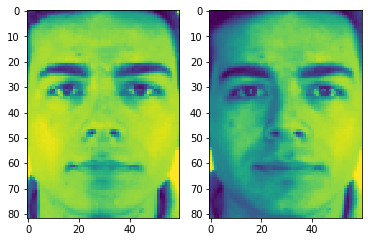

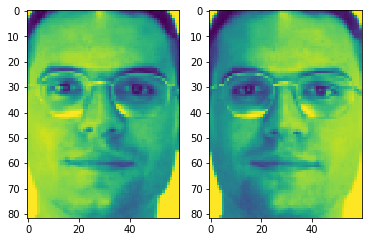

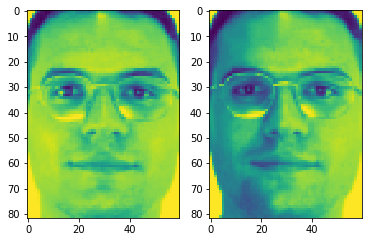

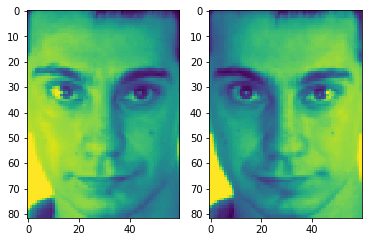

In [1138]:
KNN = KNeighborsClassifier(3)
KNN.fit(X_train, y_train)
y_predict = KNN.predict(X_test)

good_preds = np.sum(y_predict == y_test)

for i in range(good_preds):

    idx_test = np.argwhere(y_predict == y_test).flatten()
    idx_train = y_predict[ np.argwhere(y_predict == y_test).flatten() ] *5-1

    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(X_test[idx_test[i],:].reshape(n,m).T)
    ax2.imshow(X_train[idx_train[i],:].reshape(n,m).T)

In [1155]:
dims = 250


scores = []
for dim in range(1,dims):
    reducted_train = pca.project(X_train, dim)
    reducted_test = pca.project(X_test, dim)

    KNN = KNeighborsClassifier(3)
    KNN.fit(reducted_train, y_train)
    y_predict = KNN.predict(reducted_test)


    good_preds = np.sum(y_predict == y_test)
    
    scores.append(good_preds)
    #print(f"reduction dimension:{dim}, score:{good_preds}" )


Text(0, 0.5, '% Poprawnych klasyfikacji')

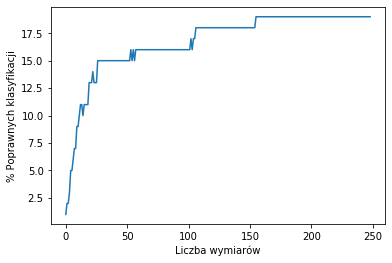

In [1157]:
plt.plot(scores)
plt.xlabel('Liczba wymiarów')
plt.ylabel('% Poprawnych klasyfikacji')

In [1158]:
reducted_train = pca.project(X_train, 160)
reducted_test = pca.project(X_test, 160)


scores = []
for k in range(1,30):

    KNN = KNeighborsClassifier(k)
    KNN.fit(reducted_train, y_train)
    y_predict = KNN.predict(reducted_test)
    scores.append(np.sum(y_predict == y_test))

Najlepsze k: 3


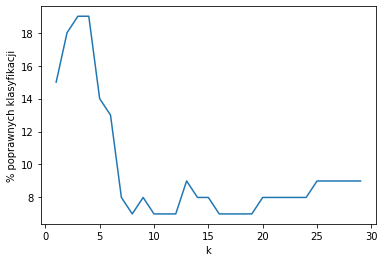

In [1159]:
plt.plot(range(1,30), scores)
plt.xlabel('k')
plt.ylabel('% poprawnych klasyfikacji')
print(f"Najlepsze k: {np.argmax(scores)+1}" )

In [1173]:
X = np.concatenate((X_train,X_test) )
y = np.concatenate((y_train,y_test) )

In [ ]:
pca5 = PCA()
pca.fit(X)